In [1]:
# Data Preprocessing
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv("Country-data.csv") 

In [3]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## Missing Values

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

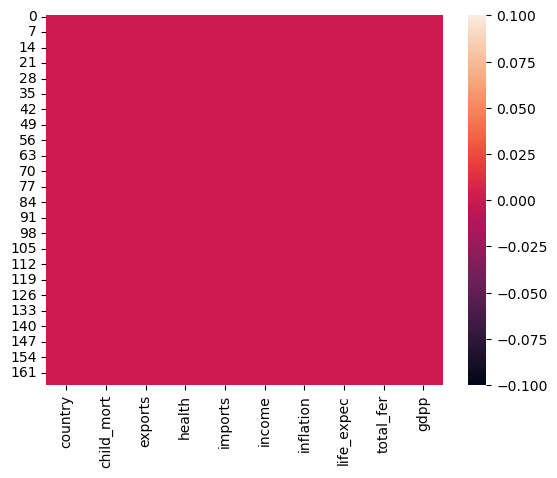

In [8]:
sns.heatmap(data.isnull())

## Univariate Analysis

In [10]:
data['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [11]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
data.columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

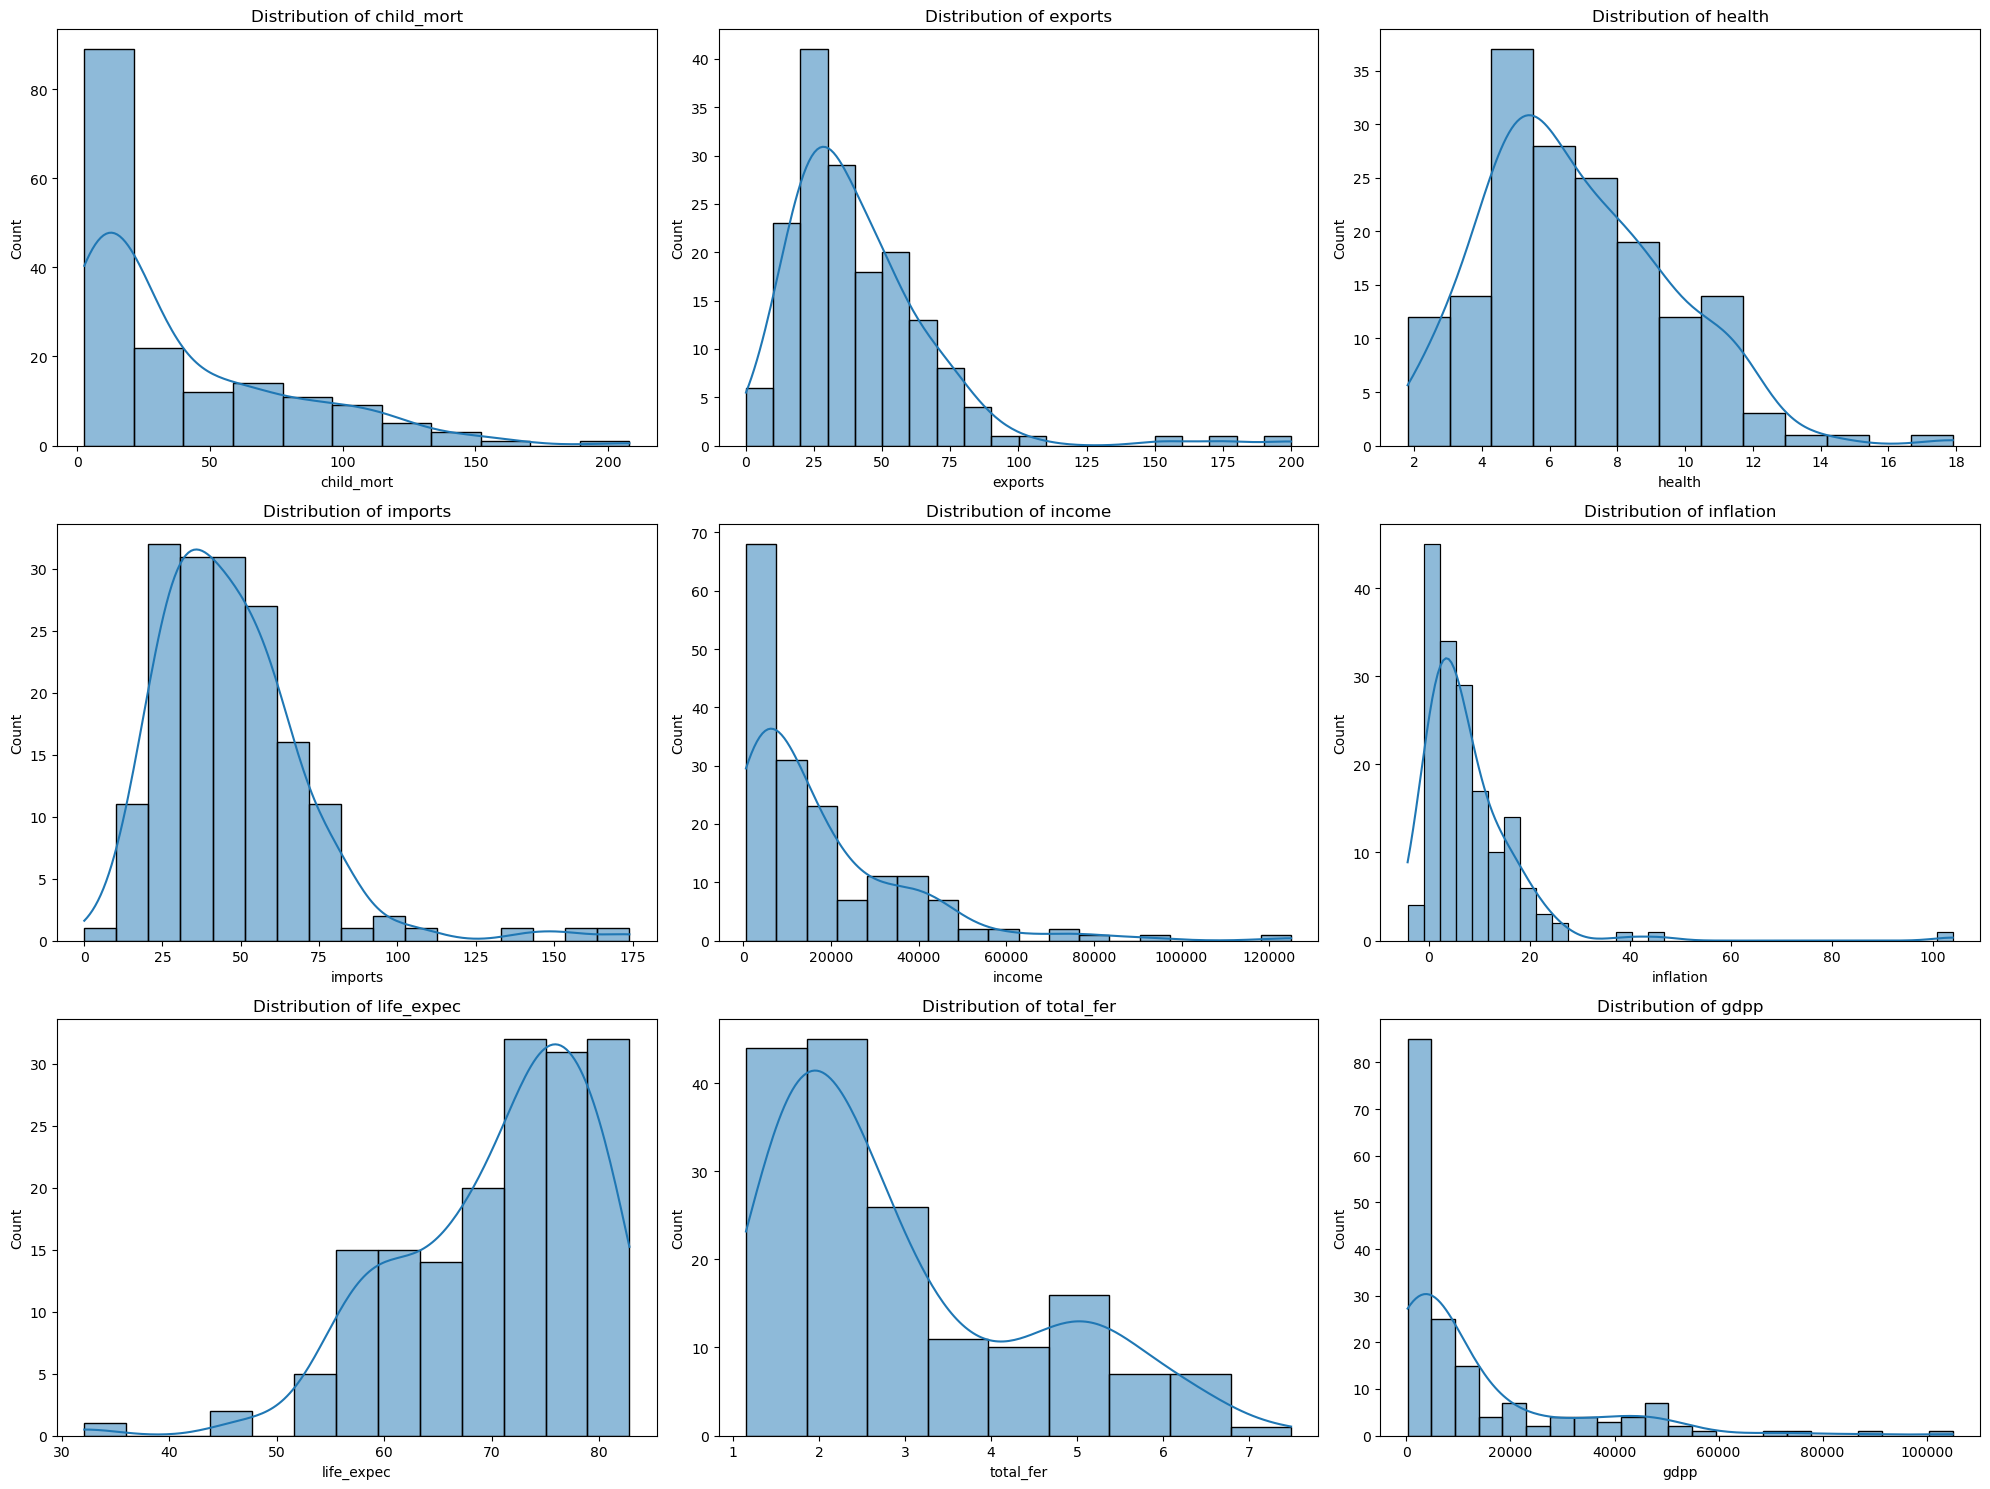

In [13]:
# Plotting distributions for each numerical feature
plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


#### Insights:
- Child Mortality (child_mort):
  Skewed right, indicating a higher frequency of lower child mortality rates.

- Exports (exports):
  Slightly skewed right, indicating most countries have lower export percentages.

- Health (health):
  Relatively symmetric distribution around the mean.

- Imports (imports):
  Slightly skewed right, similar to exports.

- Income (income):
  Highly skewed right, with a few countries having significantly higher incomes.

- Inflation (inflation):
  Skewed right, with some countries experiencing high inflation rates.

- Life Expectancy (life_expec):
  Relatively symmetric distribution around the mean.

- Total Fertility Rate (total_fer):
  Skewed right, with higher frequency of lower fertility rates.

- GDP per capita (gdpp):
  Highly skewed right, indicating a few countries with very high GDP per capita.

### Bivariate Analysis

In [16]:
data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

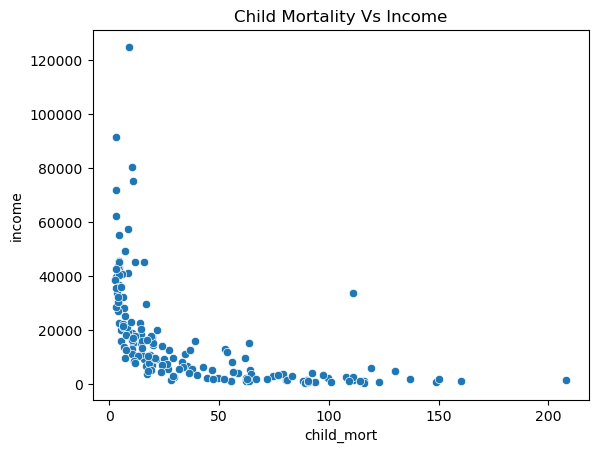

In [17]:
# Child Mortality Vs Income

sns.scatterplot(x='child_mort', y='income', data=data)
plt.title("Child Mortality Vs Income")
plt.show()

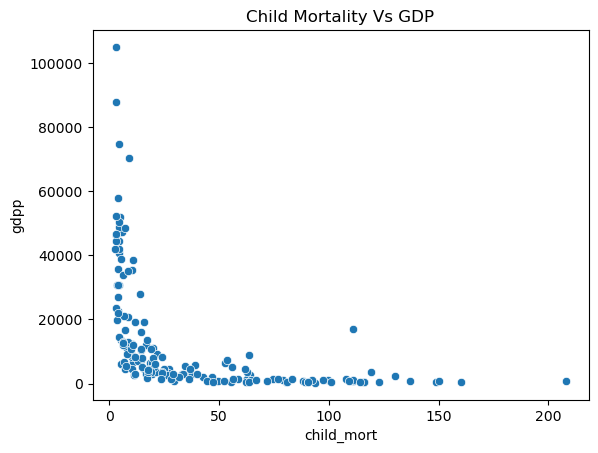

In [18]:
sns.scatterplot(x='child_mort', y='gdpp', data=data)
plt.title("Child Mortality Vs GDP")
plt.show()

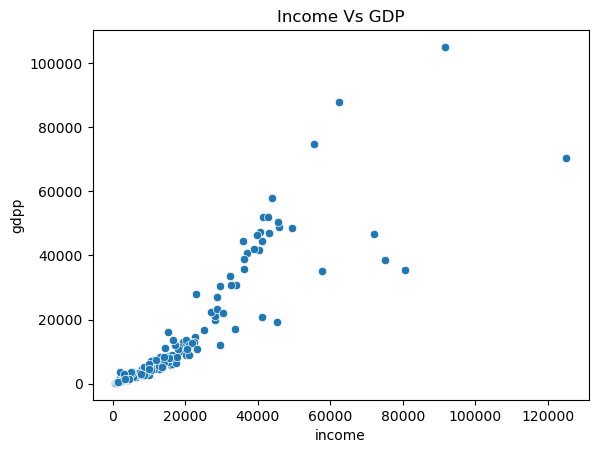

In [19]:
sns.scatterplot(x='income', y='gdpp', data=data)
plt.title("Income Vs GDP")
plt.show()

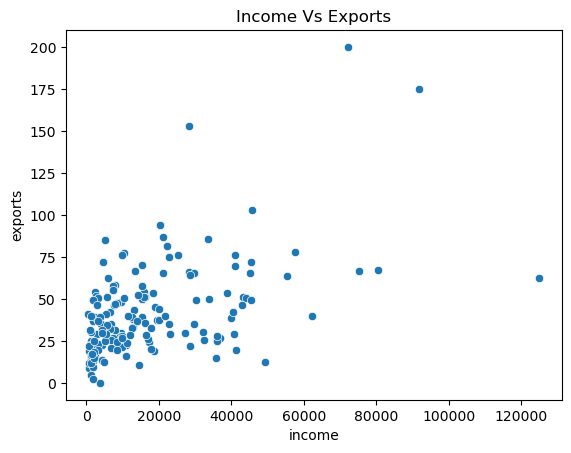

In [20]:
# sns.barplot(x='country', y='gdpp', data=data.sort_values(by="gdpp")[:5])
sns.scatterplot(x='income', y='exports', data=data)
plt.title("Income Vs Exports")
plt.show()

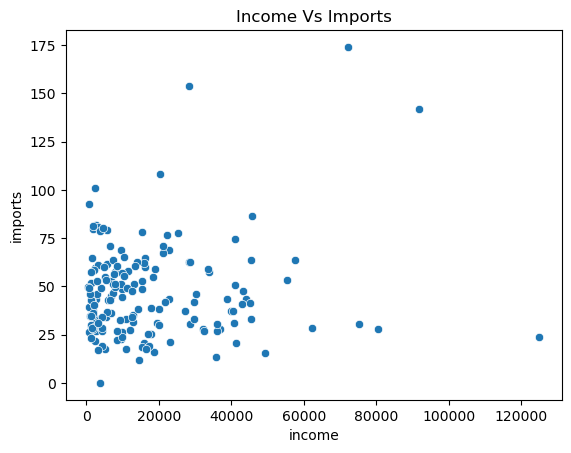

In [21]:
# sns.barplot(x='country', y='gdpp', data=data.sort_values(by="gdpp")[:5])
sns.scatterplot(x='income', y='imports', data=data)
plt.title("Income Vs Imports")
plt.show()

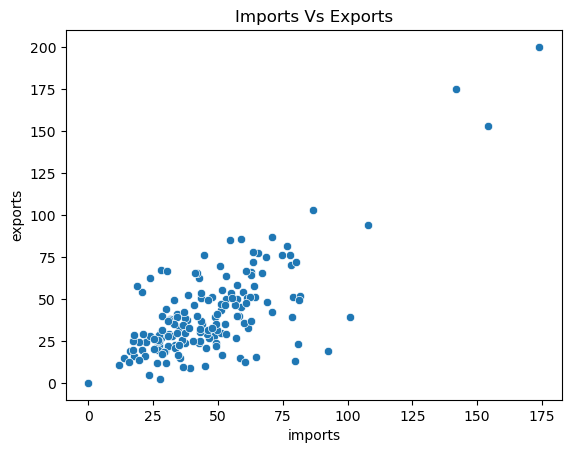

In [22]:
sns.scatterplot(x='imports', y='exports', data=data)
plt.title("Imports Vs Exports")
plt.show()

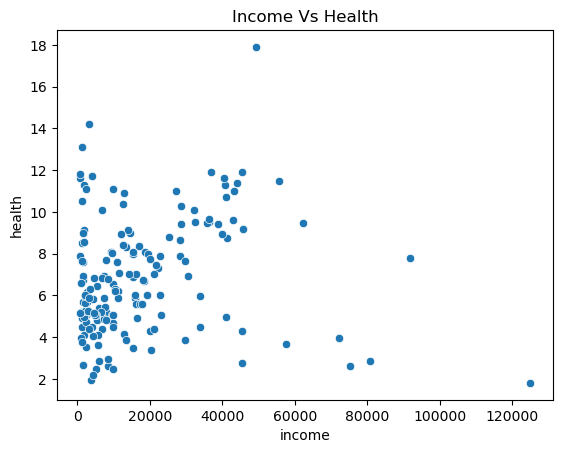

In [23]:
sns.scatterplot(x='income', y='health', data=data)
plt.title("Income Vs Health")
plt.show()

In [24]:
len(data)

167

In [25]:
167 - 5

162

In [26]:
162 // 2

81

#### countries with the heighest mortality rate

In [28]:
data.sort_values(by='child_mort', ascending=False)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
..                        ...         ...      ...     ...      ...     ...   
53                    Finland         3.0     38.7    8.95     37.4   39800   
144                    Sweden         3.0     46.2    9.63     40.7   42900   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
91                 Luxembourg         2.8    175.0    7.77    142.0   91700   
68                    Iceland         2.6     53.4    9.40     43.3   38800   

     inflation  life_expec  total_fer    gdpp  
66       5.450        32.1       3.33     662  
132     17.200        55.0       5.20     399  
32       6.390        56.5       6.59     897  
31       2.010        47.5       5.21     446  
97       4.370        59.5       6.55     708  
..         ...         ...        ...     ...  
53       0.351        80.0       1.87   46200  
144      0.991        81.5       1.98   52100  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
68       5.470        82.0       2.20   41900  

[167 rows x 10 columns]

In [29]:
top_five_child_mort = data.sort_values(by='child_mort', ascending=False)[:5]

In [30]:
least_five_child_mort = data.sort_values(by='child_mort')[:5]

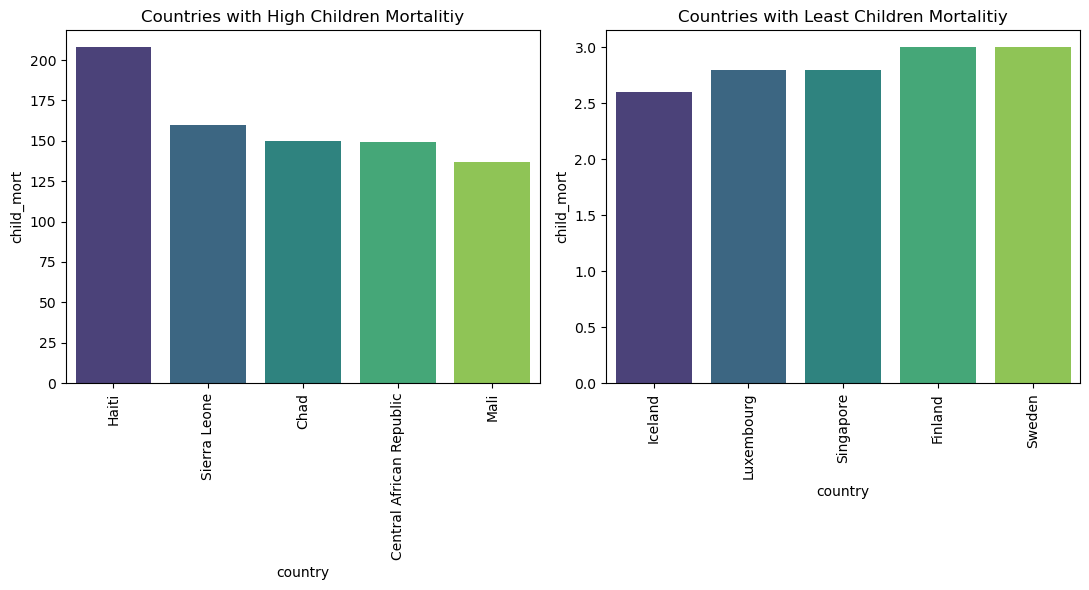

In [31]:
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(11, 6))
plt.subplot(1,2,1)
sns.barplot(x ='country', y ='child_mort', data=top_five_child_mort, palette='viridis')
plt.title('Countries with High Children Mortalitiy')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x ='country', y ='child_mort', data=least_five_child_mort, palette='viridis')
plt.title('Countries with Least Children Mortalitiy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## TODO: 
Perform bivariate EDA on the following:

1. Countries Exports levels (High, Least)
2. Countries Health Spending levels (High, Least)
3. Countries Life Expectancy levels (High, Least)
4. Countries Female Fertility Rate levels (High, Least)
5. Countries GDP Contribution /Person levels (High, Least)

### Multivariate Analysis

In [34]:
data.select_dtypes(exclude='object').corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

In [35]:
numerical_data_corr = data.select_dtypes(exclude='object').corr()

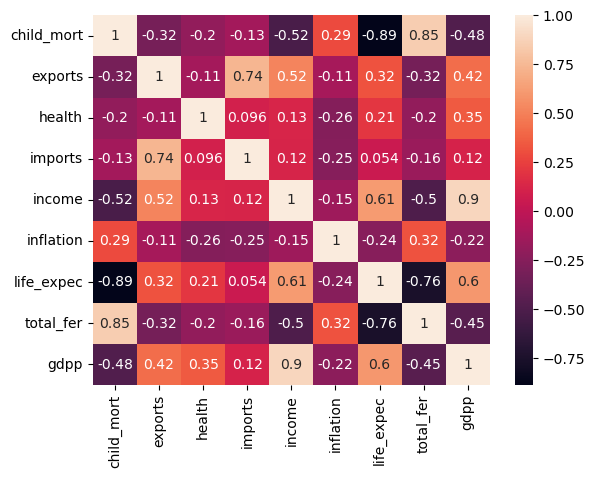

In [36]:
import numpy as np
sns.heatmap(numerical_data_corr, annot=True)
plt.show()

Some features belong to similar categories and behave similarly with features from other categories:

Lets create new features that fall into the three categories:

1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

In [38]:
data[['child_mort', 'health', 'life_expec', 'total_fer']]

child_mort  health  life_expec  total_fer
0          90.2    7.58        56.2       5.82
1          16.6    6.55        76.3       1.65
2          27.3    4.17        76.5       2.89
3         119.0    2.85        60.1       6.16
4          10.3    6.03        76.8       2.13
..          ...     ...         ...        ...
162        29.2    5.25        63.0       3.50
163        17.1    4.91        75.4       2.47
164        23.3    6.84        73.1       1.95
165        56.3    5.18        67.5       4.67
166        83.1    5.89        52.0       5.40

[167 rows x 4 columns]

### Feature Engineering

In [40]:
new_data = pd.DataFrame()
new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) + 
                      (data['health'] / data['health'].mean()) - 
                      (data['child_mort'] / data['child_mort'].mean()) - 
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())  

In [41]:
new_data.head()

Health     Trade   Finance
0 -2.422504  1.200812 -1.076519
1  1.048966  1.717580  0.317688
2  0.002385  1.603752 -0.972476
3 -3.929096  2.430387 -2.262080
4  0.981553  2.362940  1.870058

### Feature Scaling

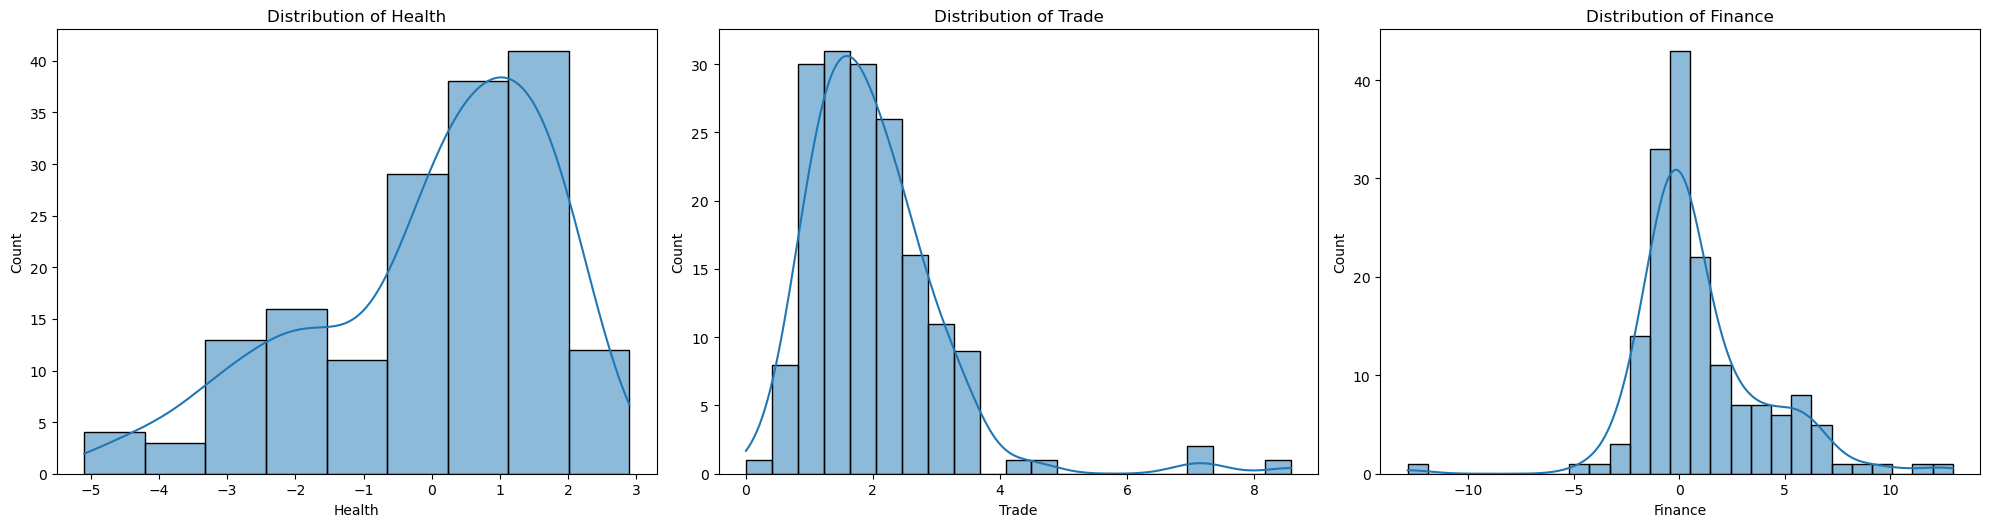

In [43]:
# Plotting distributions for each numerical feature
plt.figure(figsize=(20, 15))

for i, column in enumerate(new_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
standardscaler = StandardScaler() # Standardization

In [45]:
new_data['Finance'] = standardscaler.fit_transform(new_data[['Finance']])

In [46]:
new_data['Trade'] = standardscaler.fit_transform(new_data[['Trade']])
new_data['Health'] = standardscaler.fit_transform(new_data[['Health']])

In [47]:
# from sklearn.preprocessing import RobustScaler

# # Standardize the features
# scaler = RobustScaler()

# for col in new_data:
#     new_data[col] = scaler.fit_transform(new_data[[col]])

In [48]:
new_data

Health     Trade   Finance
0   -1.384975 -0.726043 -0.684496
1    0.599706 -0.256572 -0.224915
2    0.001363 -0.359982 -0.650200
3   -2.246312  0.390996 -1.075300
4    0.561166  0.329722  0.286803
..        ...       ...       ...
162 -0.164119  0.233909 -0.308383
163  0.288352 -0.846133 -1.613446
164  0.439832  1.328029 -0.722552
165 -0.765274 -0.487492 -1.209881
166 -1.373249 -0.400608 -0.822486

[167 rows x 3 columns]

## Modelling (K-Means)

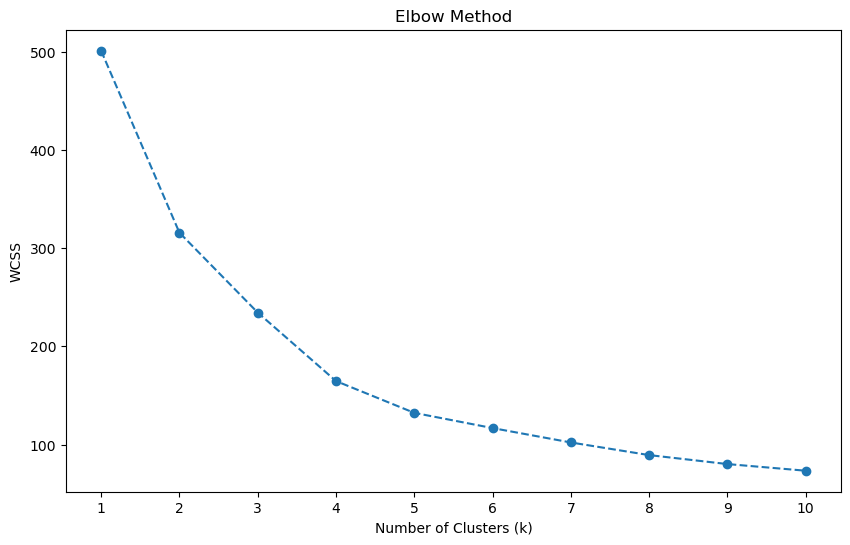

In [50]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


In [51]:
# Choose the number of clusters (k)
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=10000)

# Apply K-Means algorithm to the scaled features
kmeans.fit(new_data)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [52]:
cluster = kmeans.cluster_centers_

In [53]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [54]:
data['Class'] = kmeans.labels_

In [55]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Class  
0       9.44        56.2       5.82    553      1  
1       4.49        76.3       1.65   4090      0  
2      16.10        76.5       2.89   4460      0  
3      22.40        60.1       6.16   3530      1  
4       1.44        76.8       2.13  12200      0

In [56]:
data['Class'].value_counts()

Class
0    84
1    42
2    41
Name: count, dtype: int64

### Visualization

Since we know low income and high child mortality are related

Lets plot Income and Child mortality w.r.t class predictions

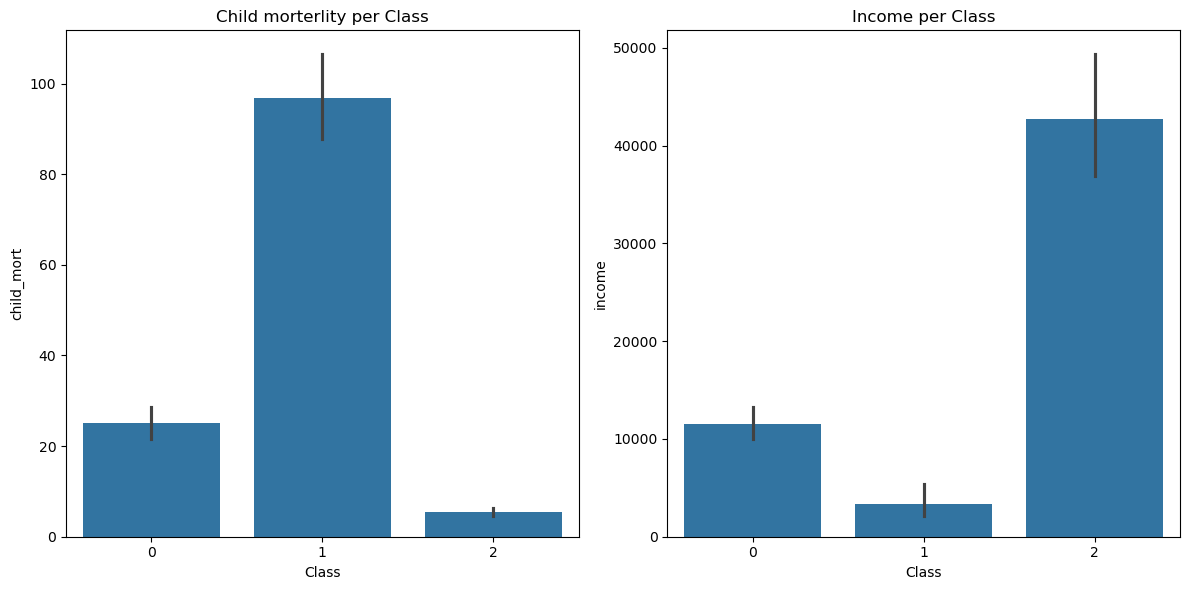

In [59]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='Class', y='child_mort', data=data) 
plt.title('Child morterlity per Class')

plt.subplot(1,2,2)
sns.barplot(x='Class', y='income', data=data)
plt.title('Income per Class')

plt.tight_layout()
plt.show()

It is clear to conlude that:

0 : Not a priority <br>
1 : Requires foreign aid <br>
2 : Do NOT requires foreign aid <br>

#### Lets rename the class

In [62]:
data[data['Class'] == 1]['Class']

0      1
3      1
17     1
25     1
26     1
28     1
31     1
32     1
36     1
37     1
38     1
40     1
49     1
50     1
55     1
56     1
59     1
63     1
64     1
66     1
69     1
80     1
84     1
88     1
93     1
94     1
97     1
99     1
106    1
107    1
112    1
113    1
116    1
129    1
132    1
142    1
147    1
149    1
150    1
155    1
165    1
166    1
Name: Class, dtype: int32

In [63]:
data['Class'][data['Class'] == 0]= "Not a priority"

In [64]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp           Class  
0       9.44        56.2       5.82    553               1  
1       4.49        76.3       1.65   4090  Not a priority  
2      16.10        76.5       2.89   4460  Not a priority  
3      22.40        60.1       6.16   3530               1  
4       1.44        76.8       2.13  12200  Not a priority

In [65]:
data['Class'][data['Class'] == 1]= "Requires foreign aid"
data['Class'][data['Class'] == 2]= "Do NOT requires foreign aid"

In [66]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp                 Class  
0       9.44        56.2       5.82    553  Requires foreign aid  
1       4.49        76.3       1.65   4090        Not a priority  
2      16.10        76.5       2.89   4460        Not a priority  
3      22.40        60.1       6.16   3530  Requires foreign aid  
4       1.44        76.8       2.13  12200        Not a priority

### Lets plot an interactive GeoMAP showing these categories

In [68]:
import plotly.express as px

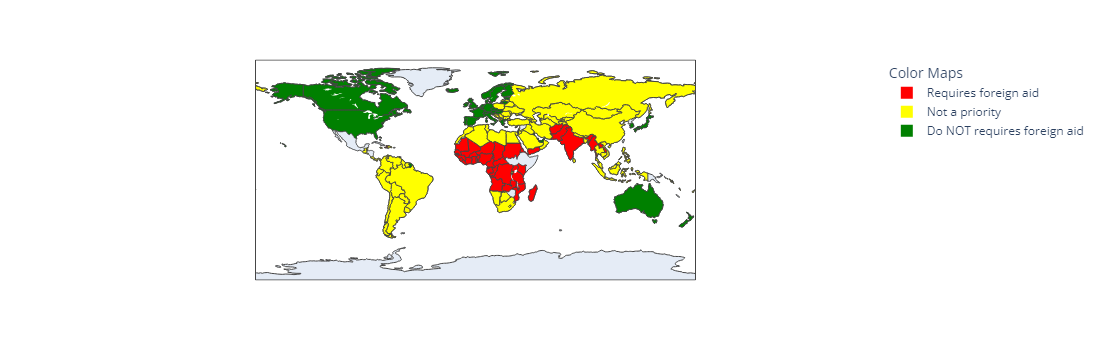

In [69]:
fig = px.choropleth(data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = data['Class'],  
                    color_discrete_map = {'Requires foreign aid':'Red',
                                        'Do NOT requires foreign aid':'Green',
                                        'Not a priority':'Yellow'}
                   )
fig.update_layout(legend_title_text = 'Color Maps')
fig.show()

The chart shows through highlight the part of the world in need of financial Aid . These insights are useful in distributing the funds by the organisation and to know which countries to prioritize.